In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:

import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression 

In [19]:
data =pd.read_csv(r'C:\Users\aarus\Downloads\diabetes-dataset.csv')
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            2      138             62             35        0  33.6   
1            0       84             82             31      125  38.2   
2            0      145              0              0        0  44.2   
3            0      135             68             42      250  42.3   
4            1      139             62             41      480  40.7   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.127   47        1  
1                     0.233   23        0  
2                     0.630   31        1  
3                     0.365   24        1  
4                     0.536   21        0

In [ ]:
# gives information about the data types,columns, null value counts, memory usage etc

data.info(verbose=True)

In [ ]:
## basic statistic details about the data (note only numerical columns would be displayed here unless parameter include="all")

data.describe().T

In [14]:
data_copy = data.copy(deep = True)
data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [15]:
## showing the count of Nans

print(data_copy.isnull().sum())

Pregnancies                   0
Glucose                      13
BloodPressure                90
SkinThickness               573
Insulin                     956
BMI                          28
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


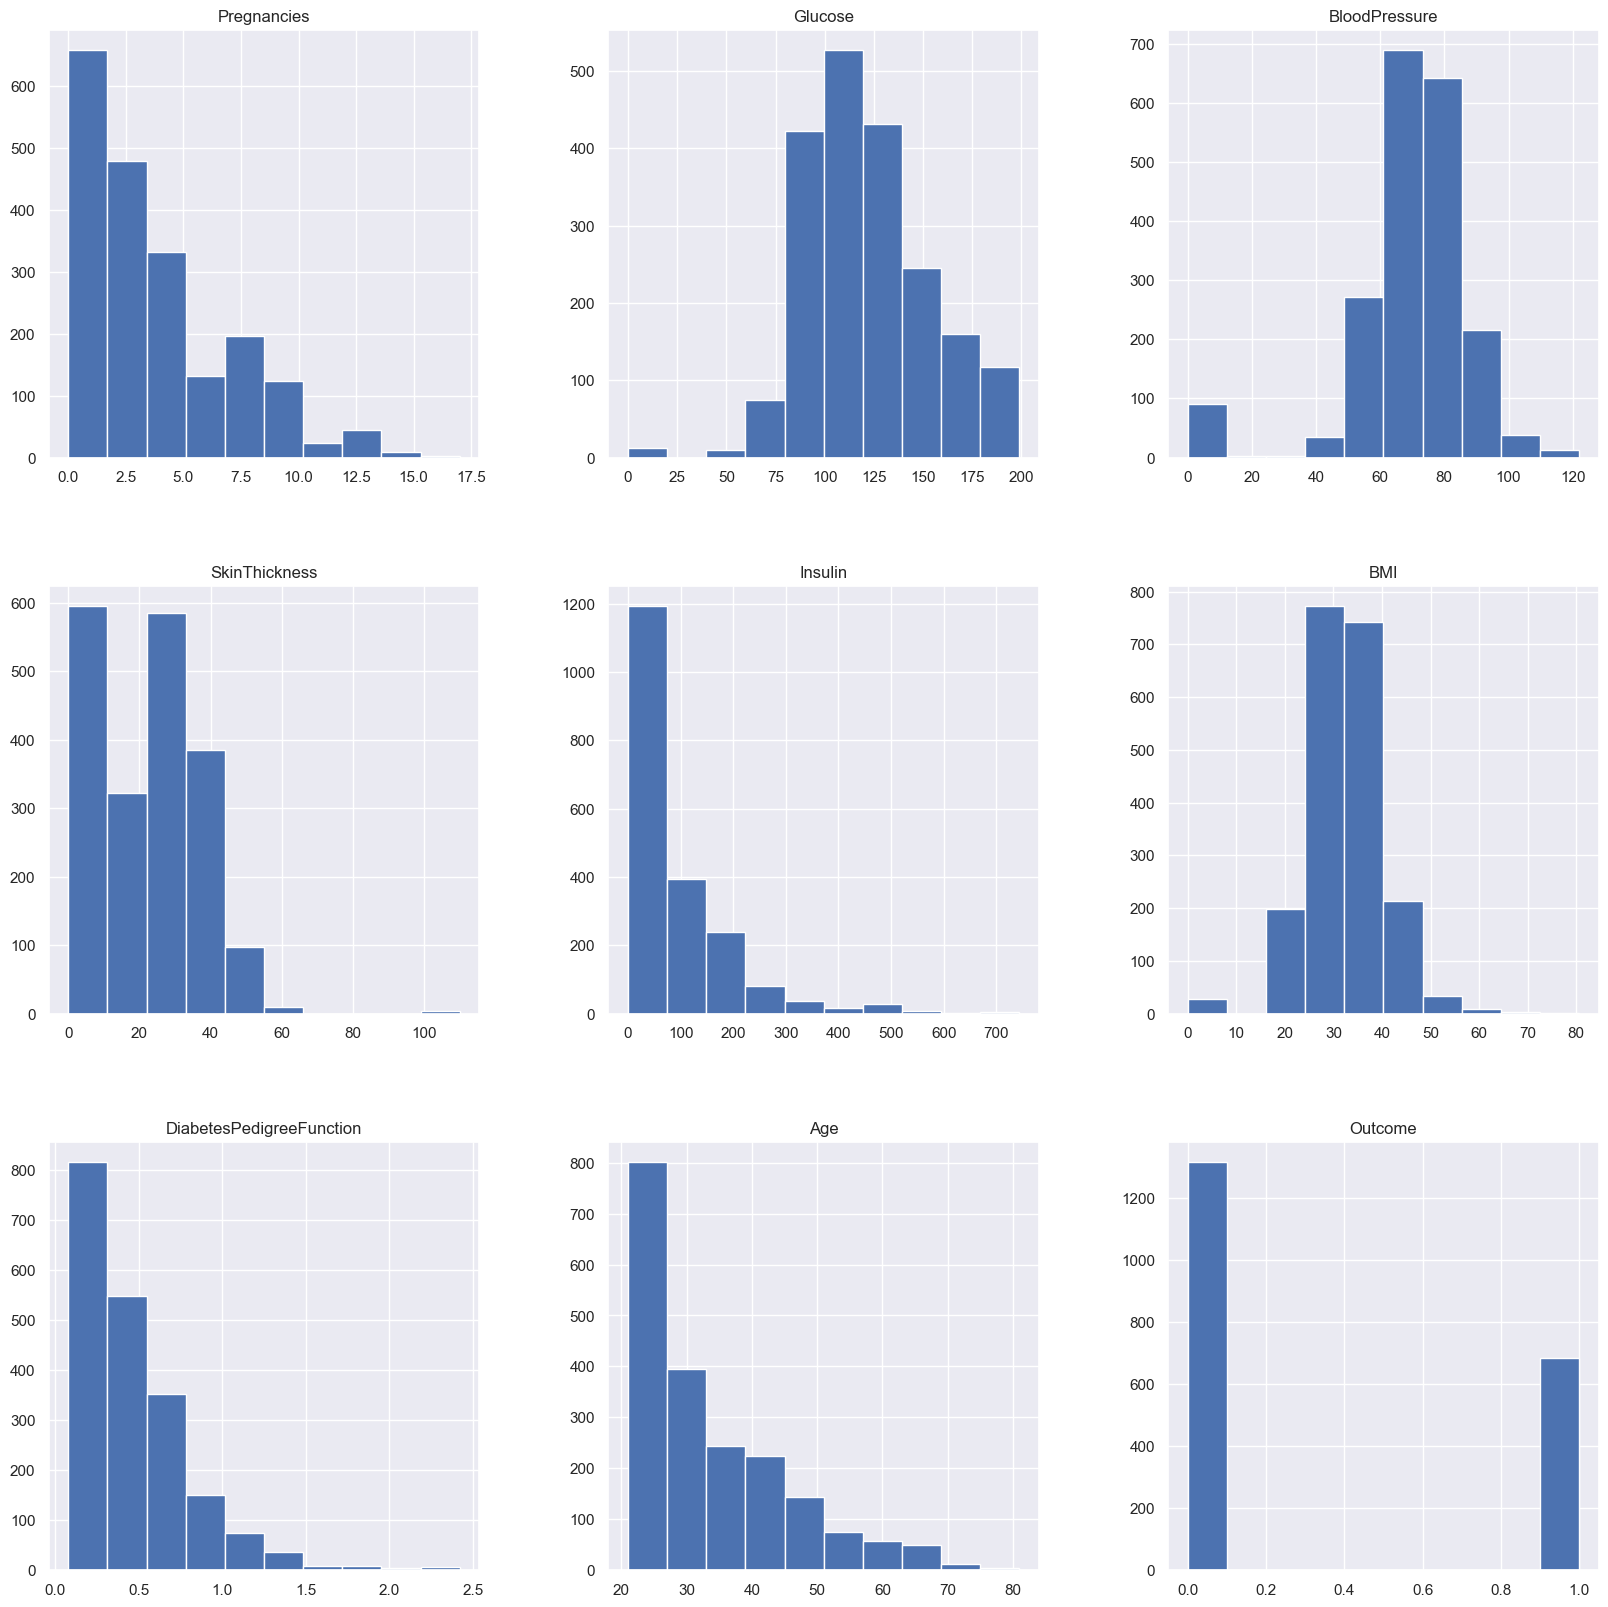

In [16]:
#To fill these Nan values the data distribution needs to be understood

p = data.hist(figsize = (20,20))

In [17]:
#Aiming to impute nan values for the columns in accordance with their distribution

data_copy['Glucose'].fillna(data_copy['Glucose'].mean(), inplace = True)
data_copy['BloodPressure'].fillna(data_copy['BloodPressure'].mean(), inplace = True)
data_copy['SkinThickness'].fillna(data_copy['SkinThickness'].median(), inplace = True)
data_copy['Insulin'].fillna(data_copy['Insulin'].median(), inplace = True)
data_copy['BMI'].fillna(data_copy['BMI'].median(), inplace = True)

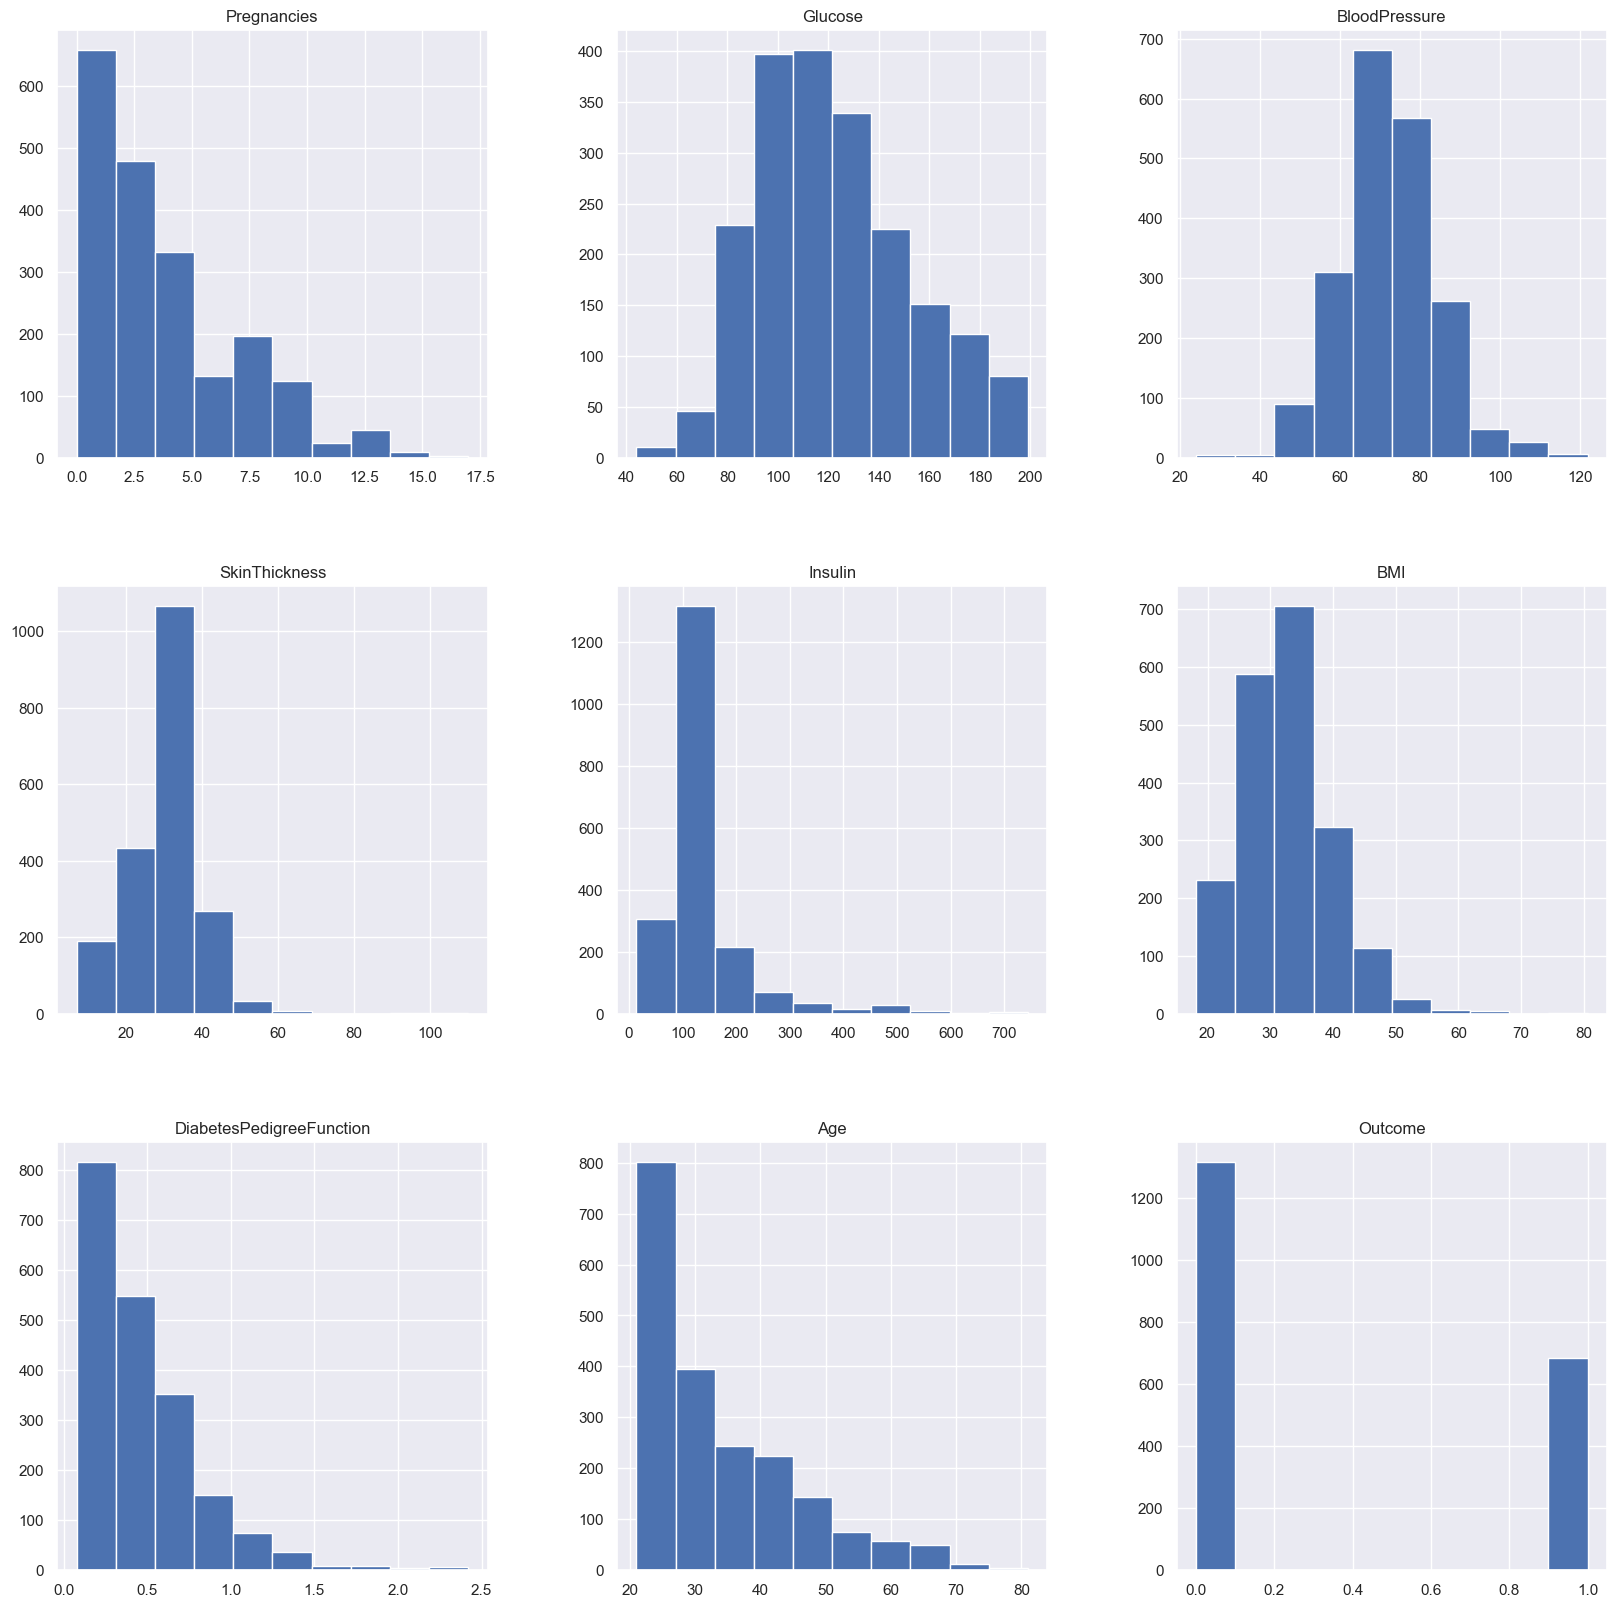

In [18]:
#Plotting after Nan removal

p = data_copy.hist(figsize = (20,20))

In [19]:
data.shape

(2000, 9)

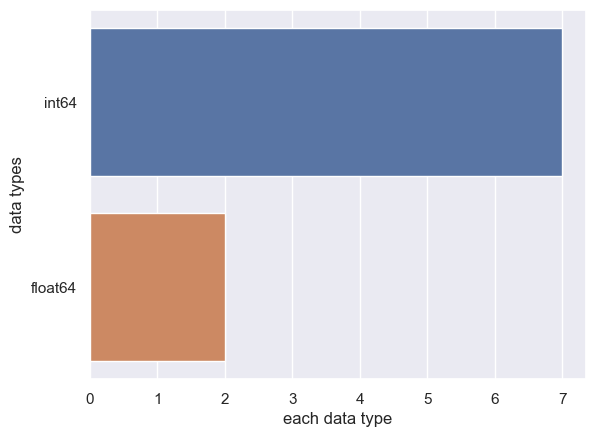

In [20]:
## data type analysis
#plt.figure(figsize=(5,5))
#sns.set(font_scale=2)

sns.countplot(y=data.dtypes ,data=data)
plt.xlabel("each data type")
plt.ylabel("data types")
plt.show()


In [24]:
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

0    1316
1     684
Name: Outcome, dtype: int64


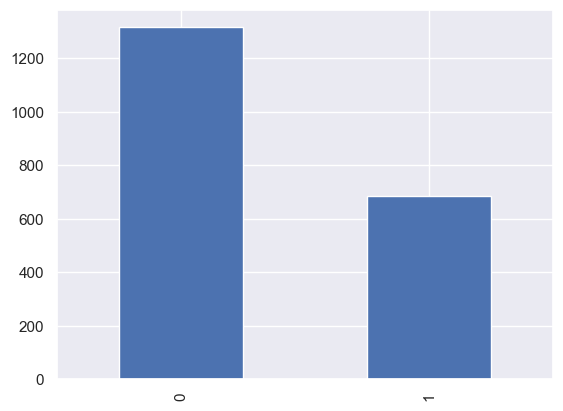

In [27]:
## checking the balance of the data by plotting the count of outcomes by their value

color_wheel = {1: "#0392cf", 
               2: "#7bc043"}
colors = data["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(data.Outcome.value_counts())
p=data.Outcome.value_counts().plot(kind="bar")

array([[<Axes: xlabel='Pregnancies', ylabel='Pregnancies'>,
        <Axes: xlabel='Glucose', ylabel='Pregnancies'>,
        <Axes: xlabel='BloodPressure', ylabel='Pregnancies'>,
        <Axes: xlabel='SkinThickness', ylabel='Pregnancies'>,
        <Axes: xlabel='Insulin', ylabel='Pregnancies'>,
        <Axes: xlabel='BMI', ylabel='Pregnancies'>,
        <Axes: xlabel='DiabetesPedigreeFunction', ylabel='Pregnancies'>,
        <Axes: xlabel='Age', ylabel='Pregnancies'>,
        <Axes: xlabel='Outcome', ylabel='Pregnancies'>],
       [<Axes: xlabel='Pregnancies', ylabel='Glucose'>,
        <Axes: xlabel='Glucose', ylabel='Glucose'>,
        <Axes: xlabel='BloodPressure', ylabel='Glucose'>,
        <Axes: xlabel='SkinThickness', ylabel='Glucose'>,
        <Axes: xlabel='Insulin', ylabel='Glucose'>,
        <Axes: xlabel='BMI', ylabel='Glucose'>,
        <Axes: xlabel='DiabetesPedigreeFunction', ylabel='Glucose'>,
        <Axes: xlabel='Age', ylabel='Glucose'>,
        <Axes: xlabel='Outcom

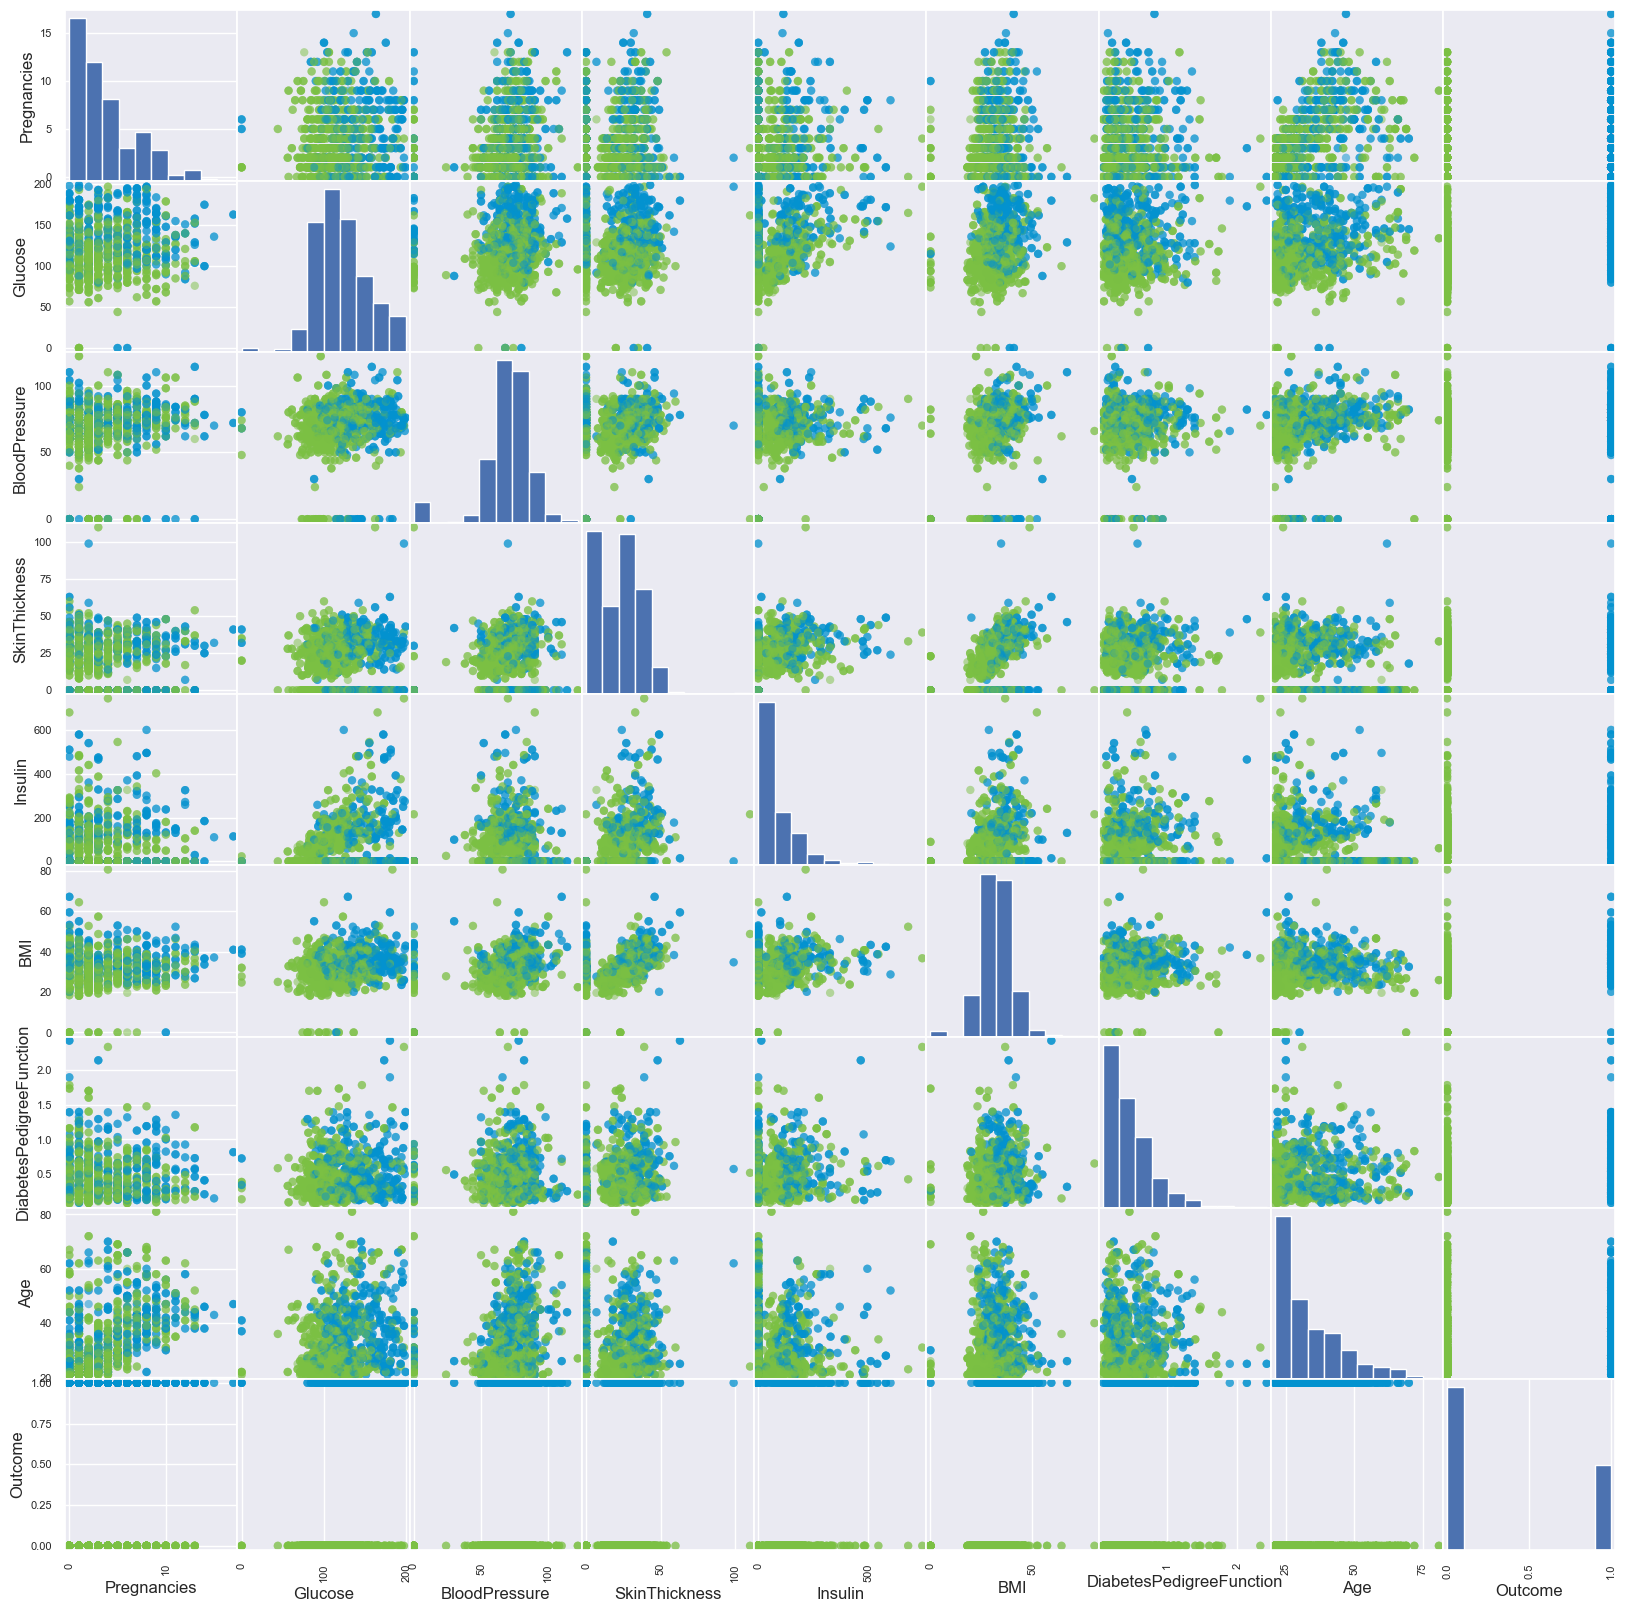

In [36]:
data_colors = {0:'green', 1:'blue'}
pd.plotting.scatter_matrix(data,figsize=(20,20),grid=True,
                           marker='o', c= data['Outcome'].map(colors))

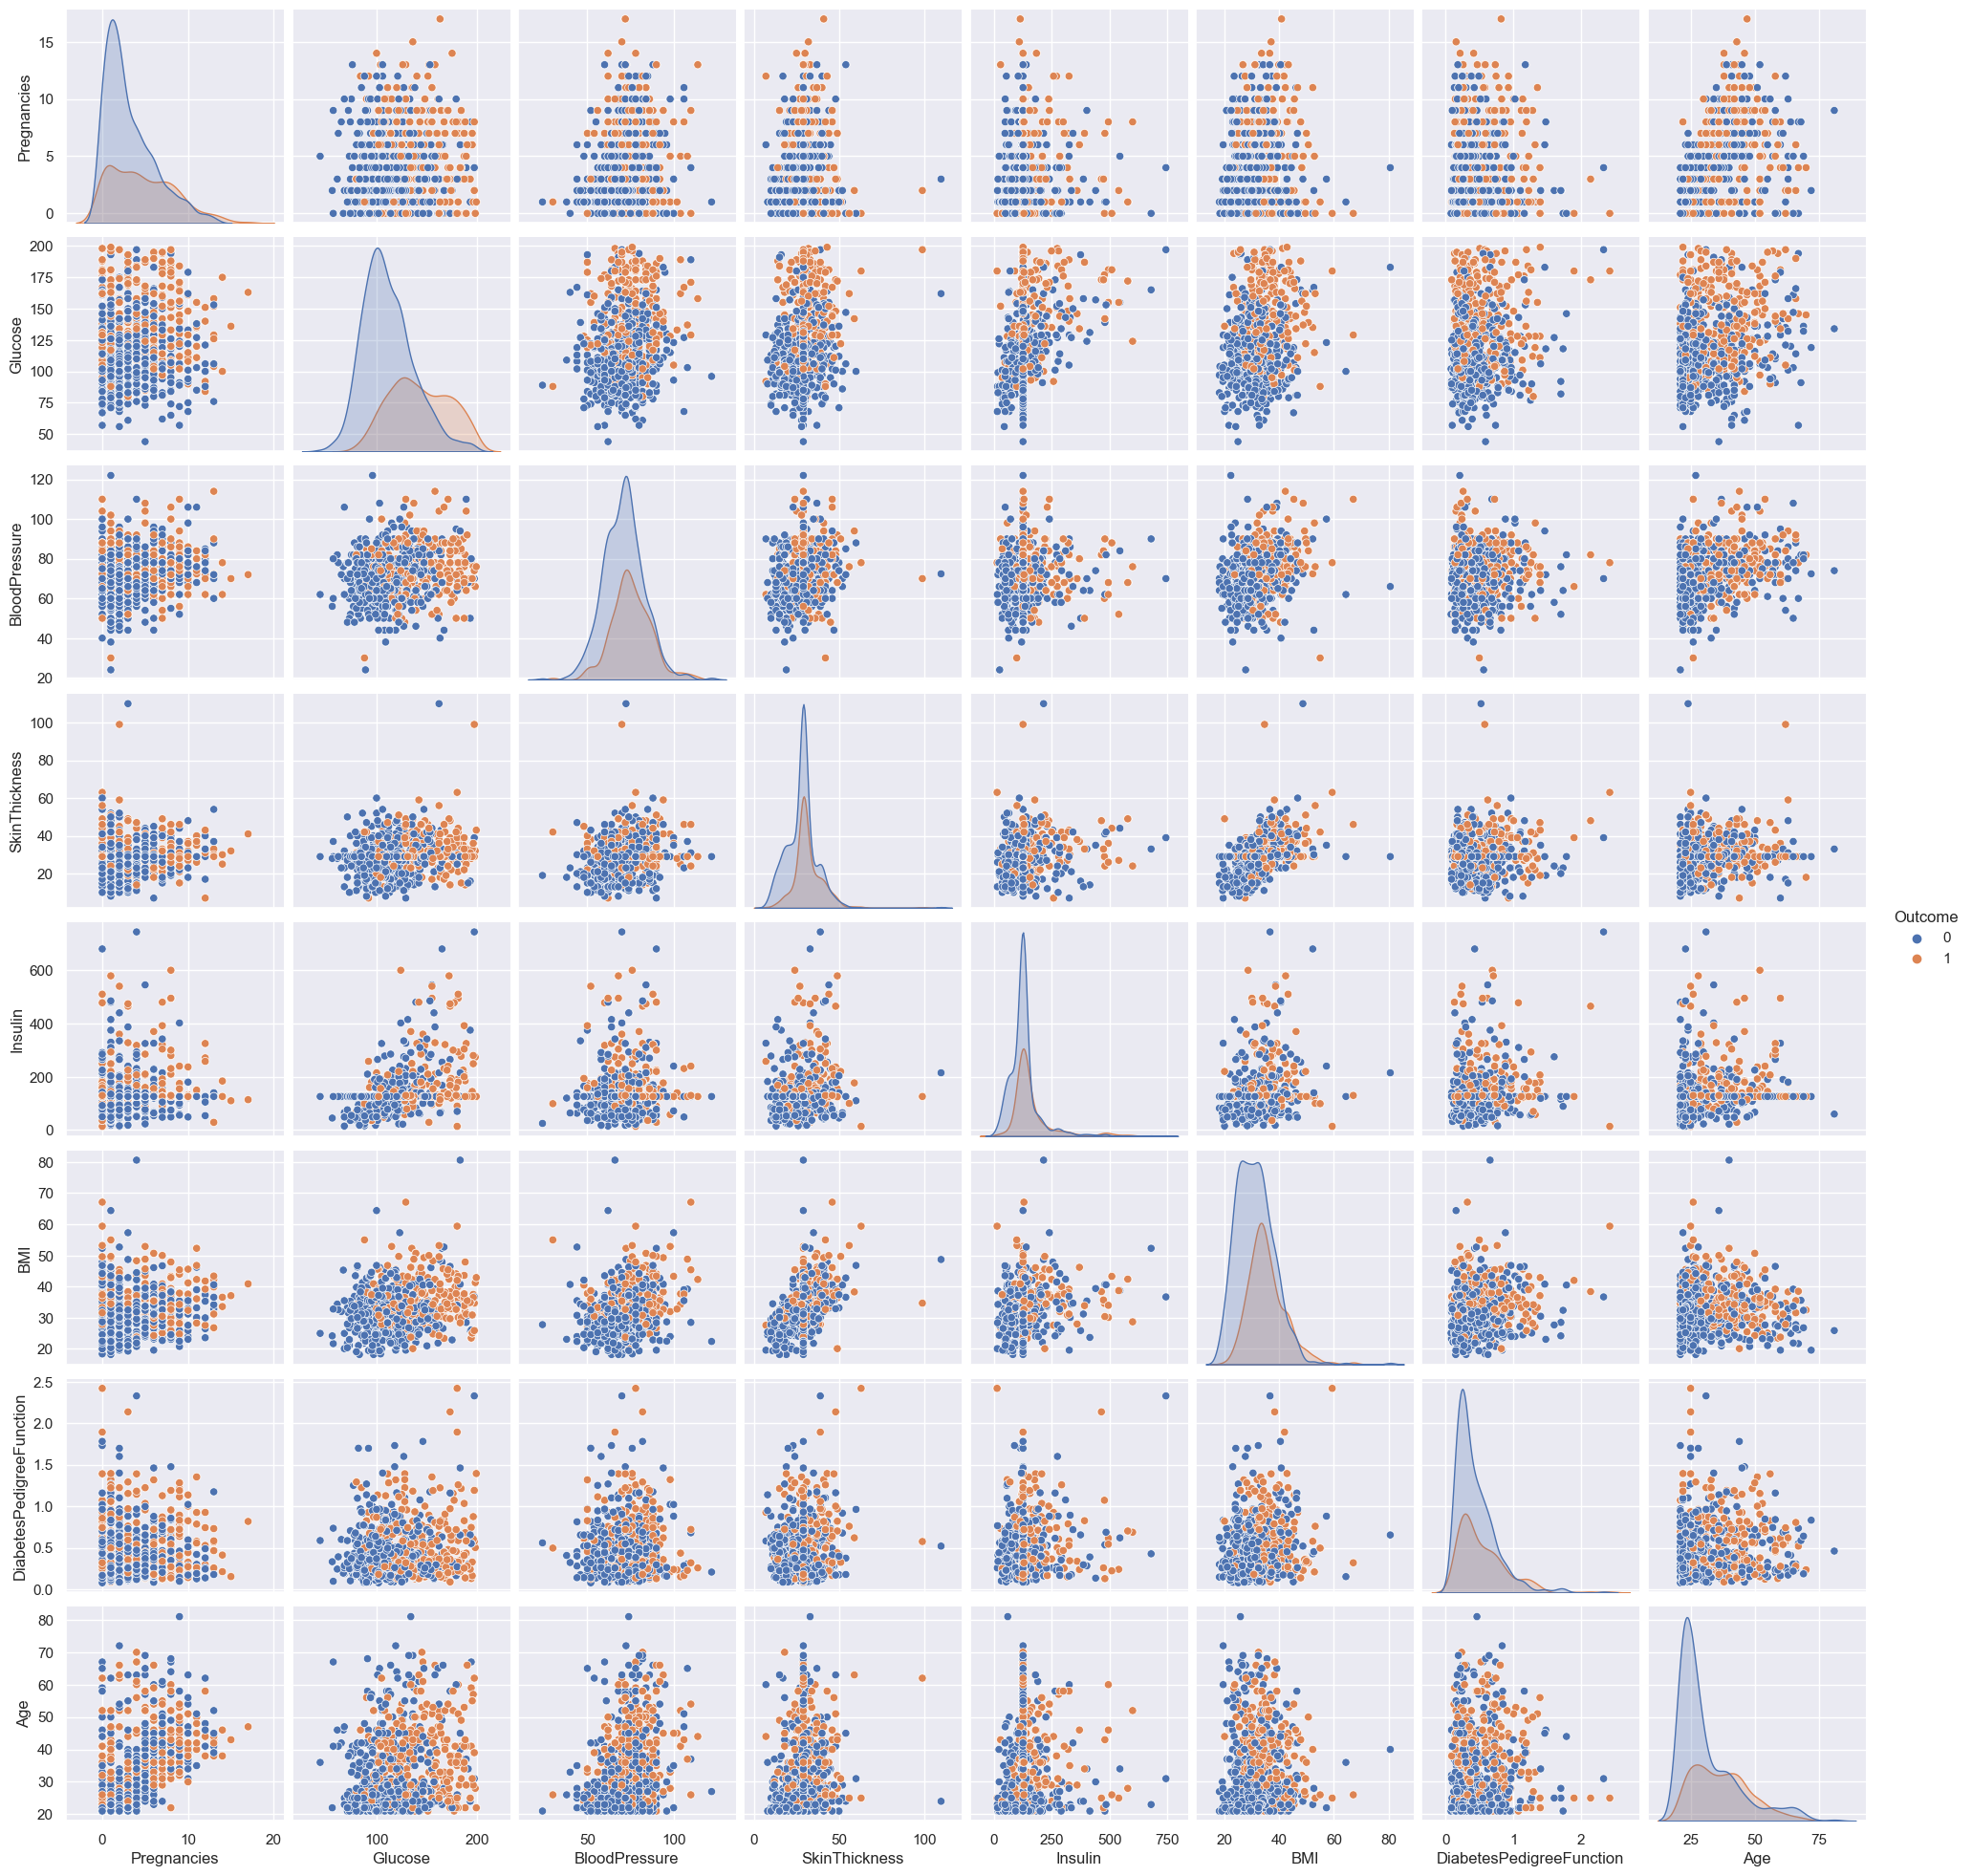

In [39]:
p=sns.pairplot(data_copy, hue = 'Outcome')

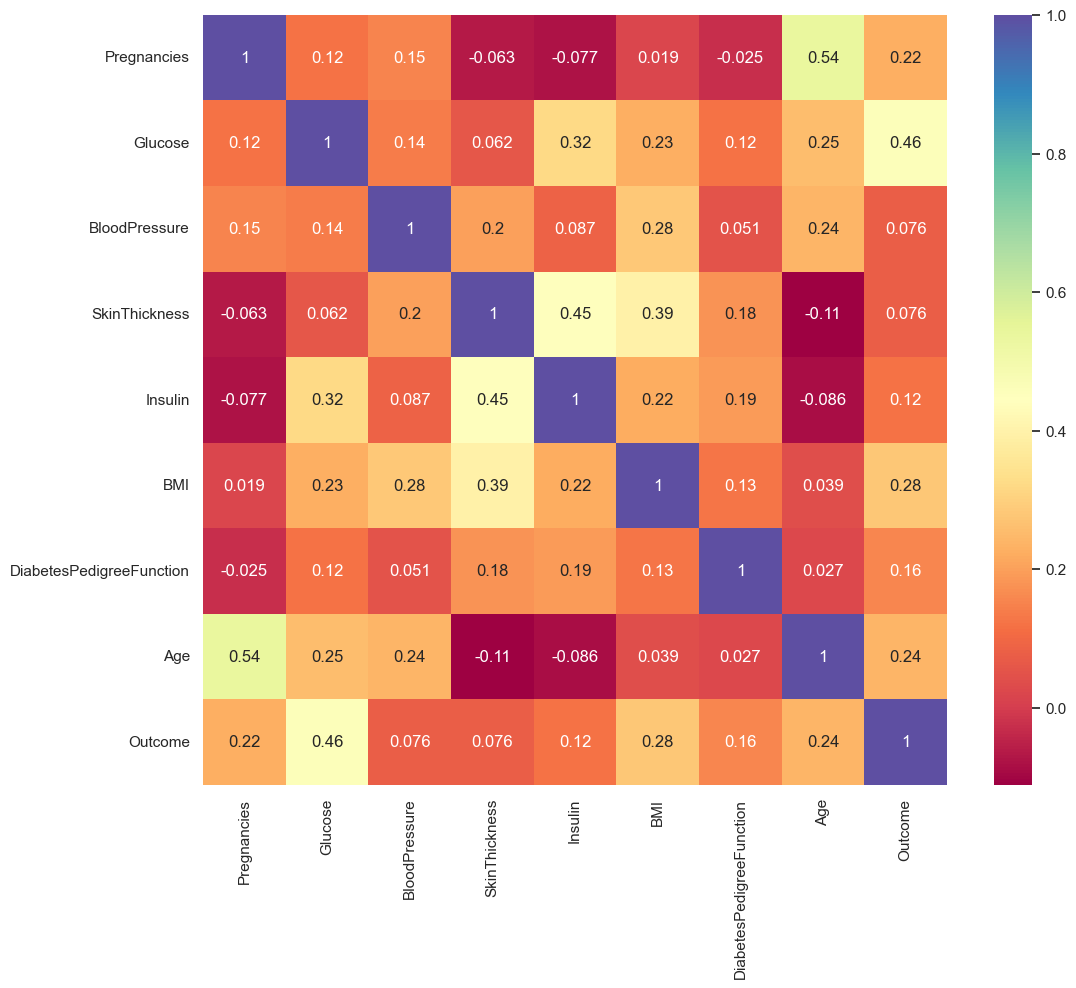

In [44]:
plt.figure(figsize=(12,10))  
# on this line I just set the size of figure to 12 by 10.

p=sns.heatmap(data.corr(), annot=True,cmap ='Spectral')  
# seaborn has very simple solution for heatmap

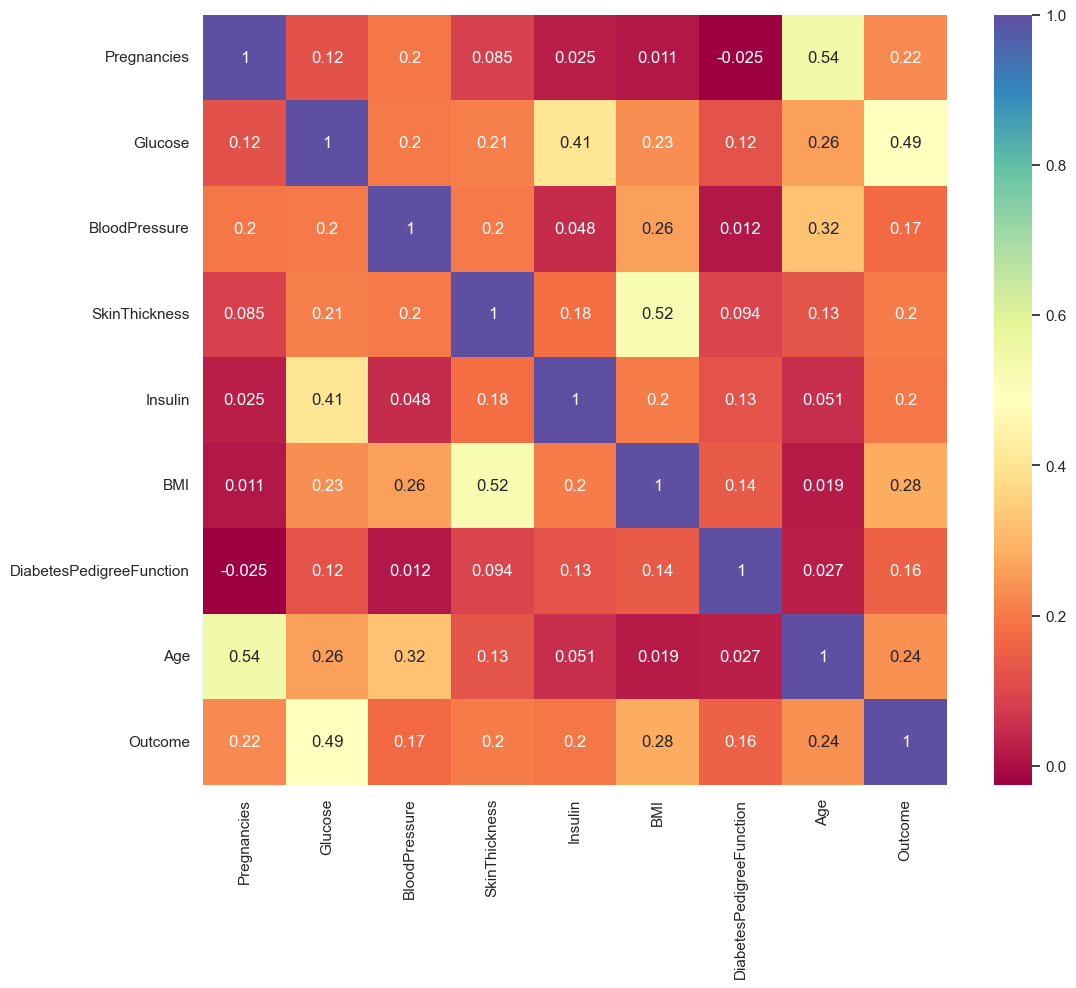

In [46]:
plt.figure(figsize=(12,10))  
# on this line I just set the size of figure to 12 by 10.

p=sns.heatmap(data_copy.corr(), annot=True,cmap ='Spectral')
# seaborn has very simple solution for heatmap

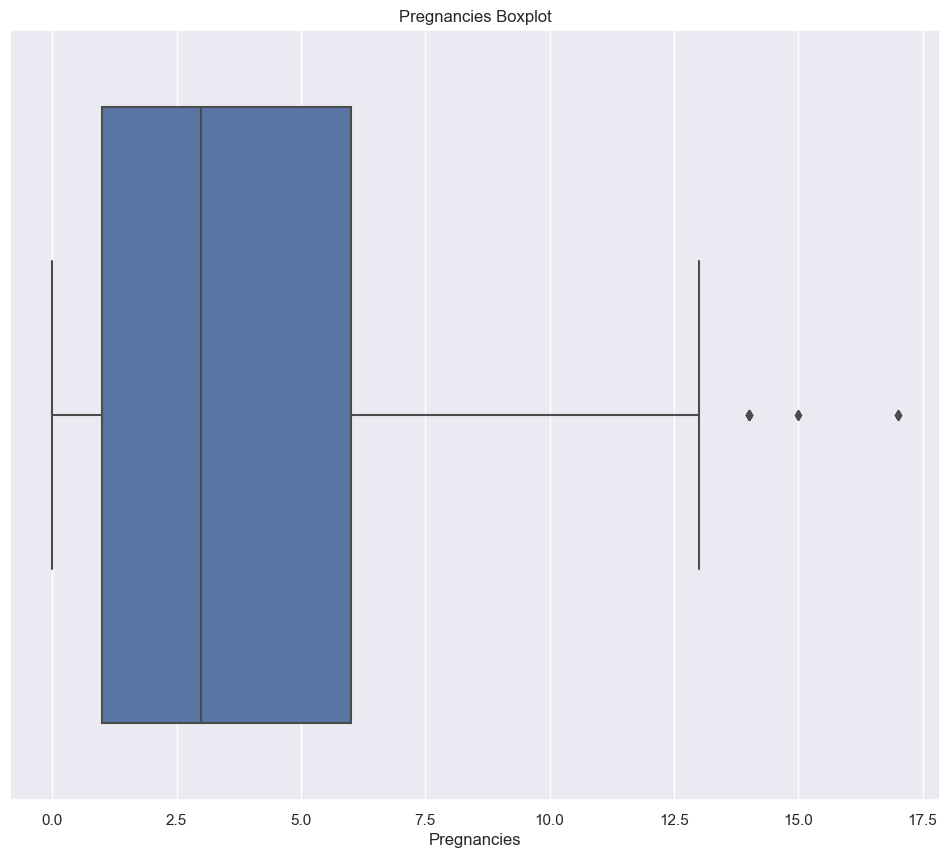

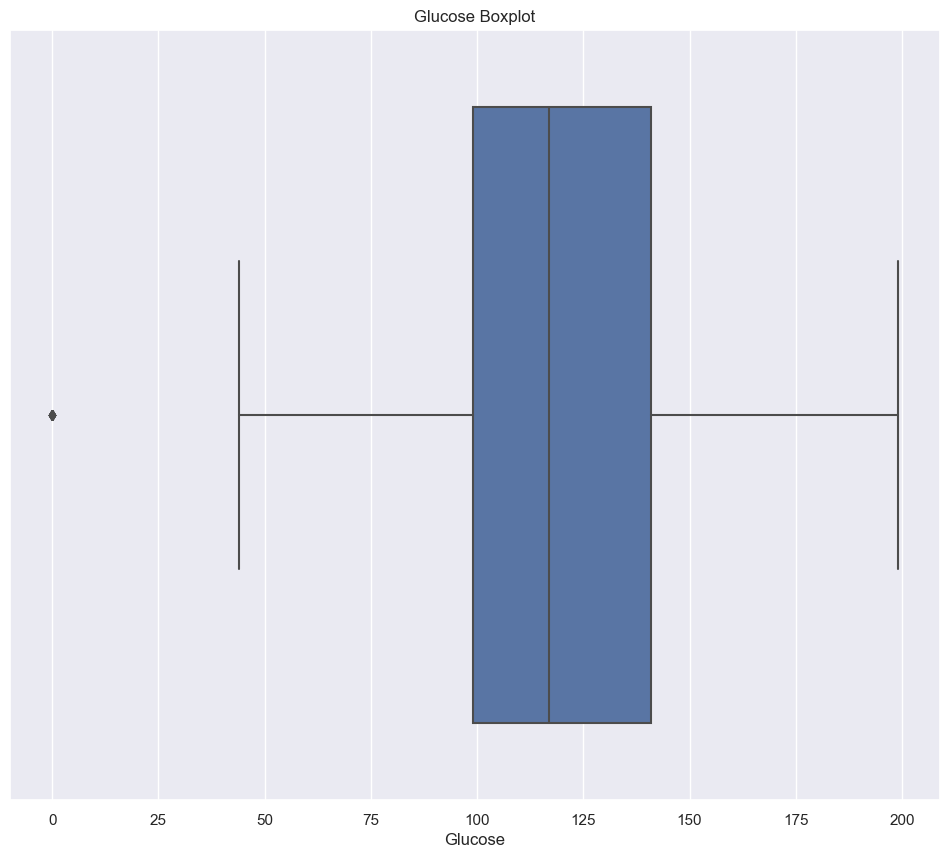

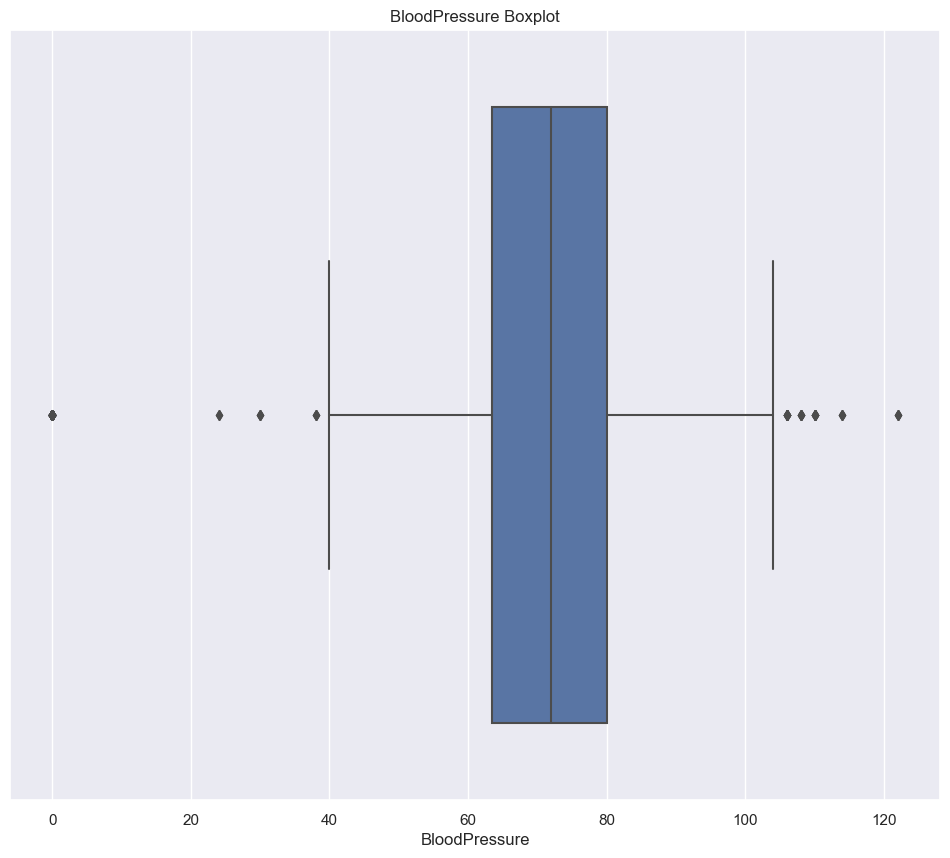

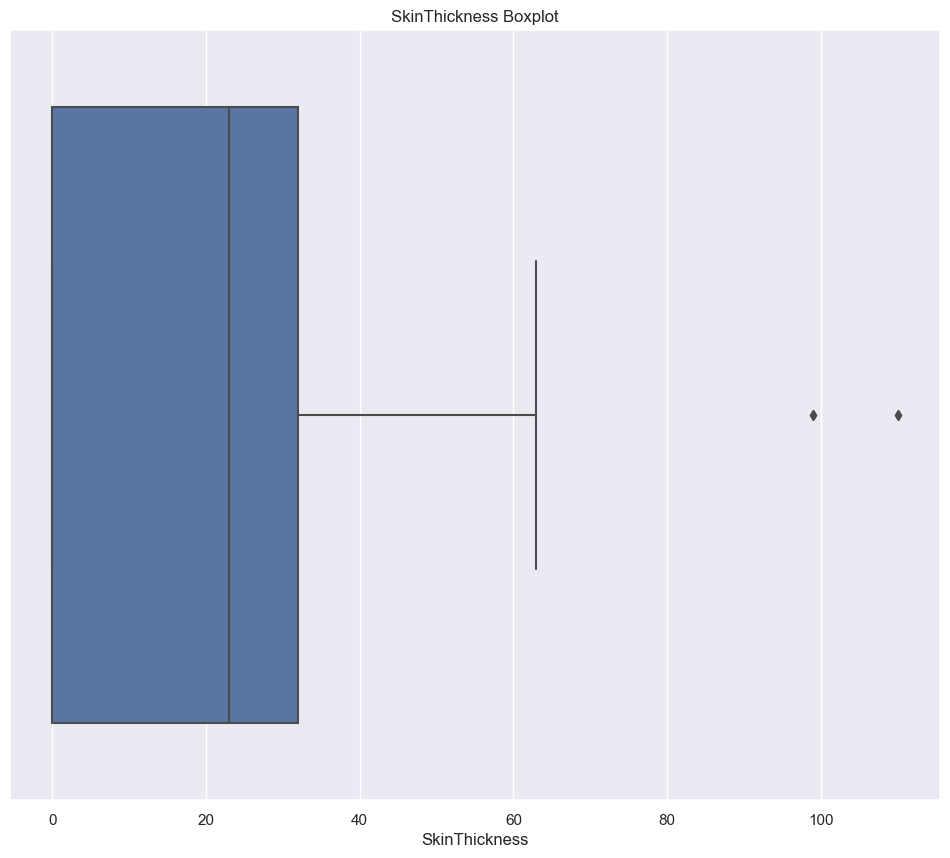

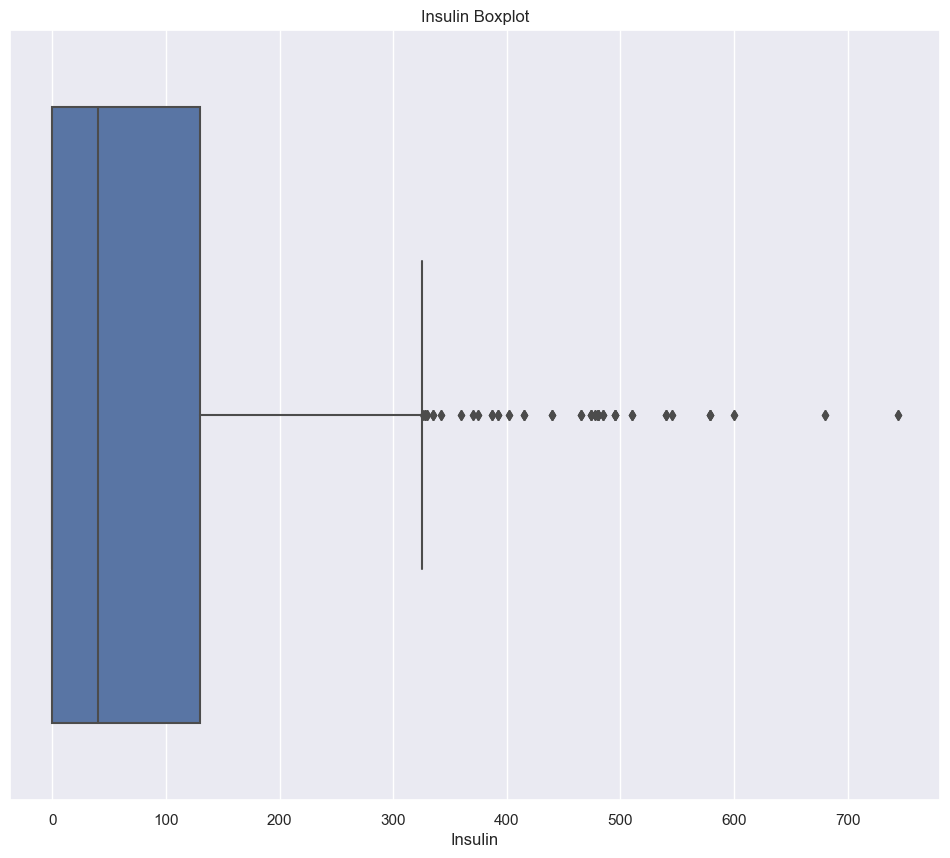

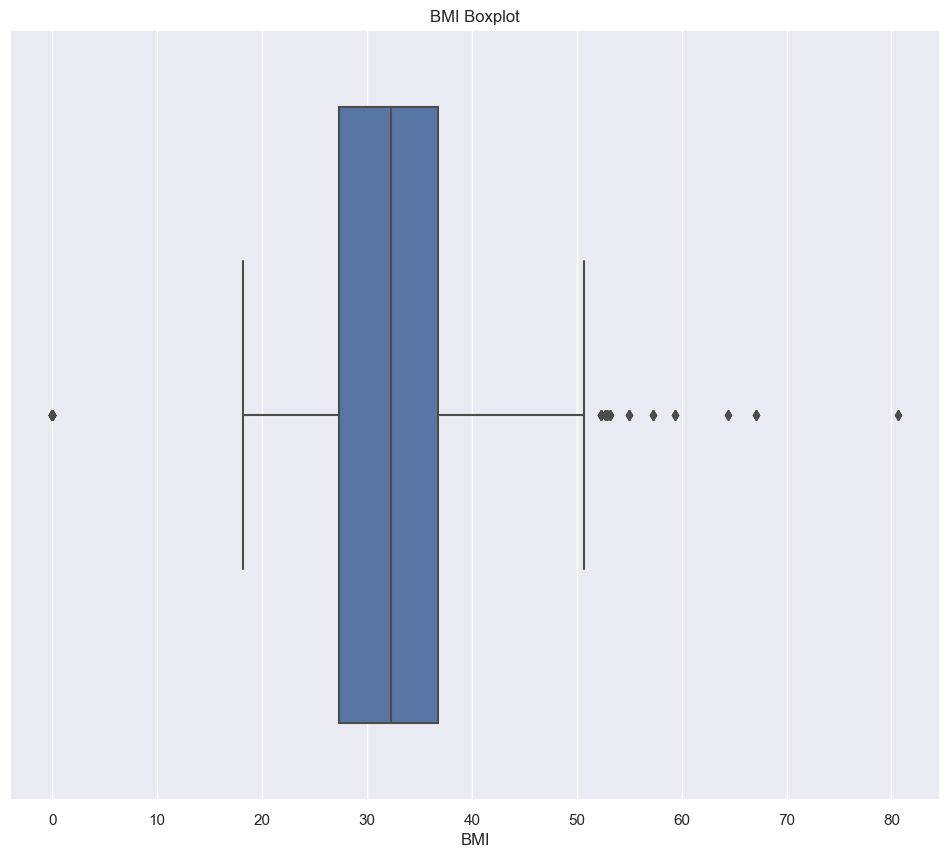

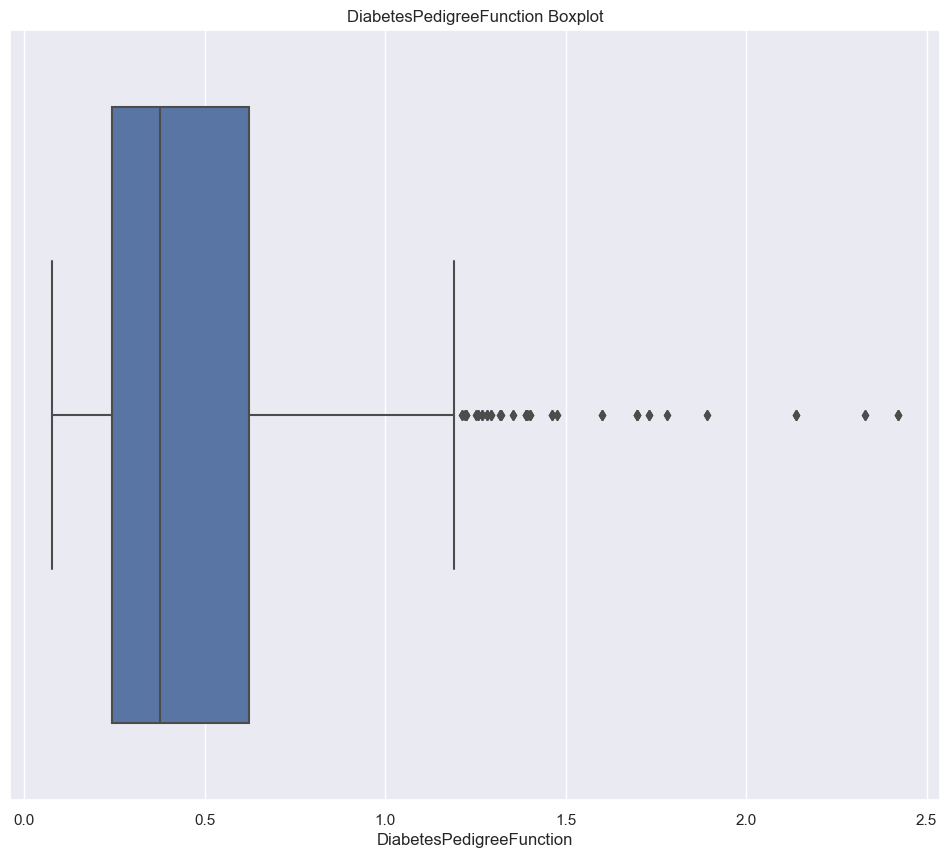

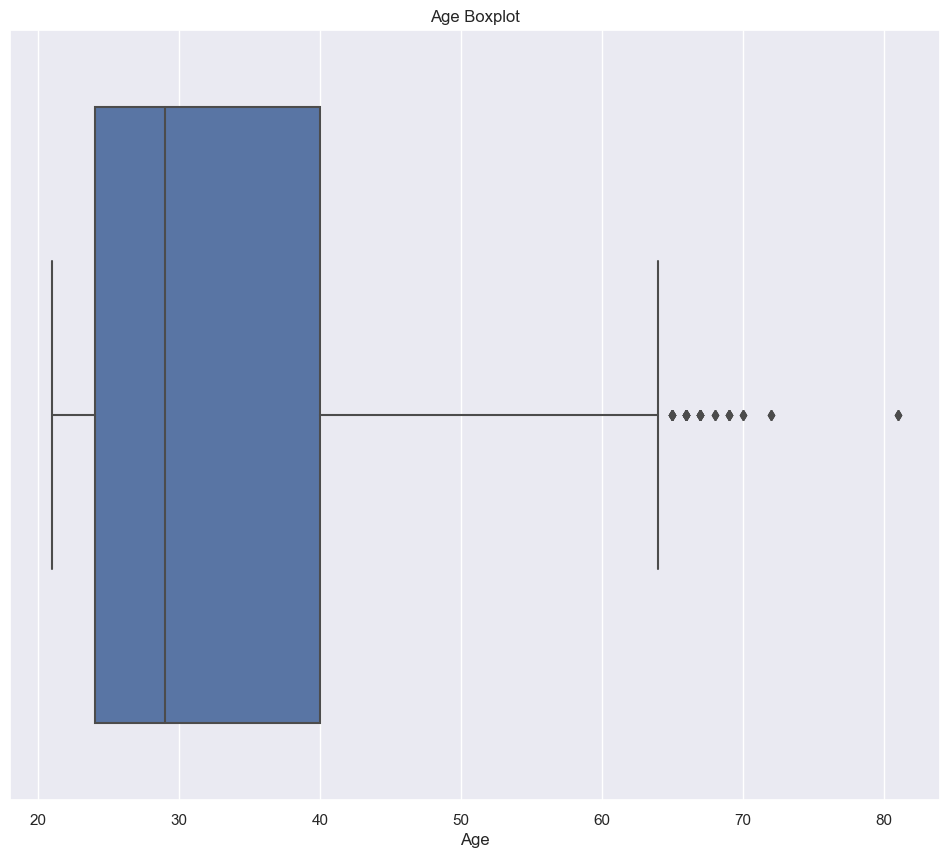

In [52]:
for column in data.columns[:-1]:
    plt.figure(figsize=(12, 10))
    plt.title(f"{column} Boxplot")
    sns.boxplot(data=data, x=column)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


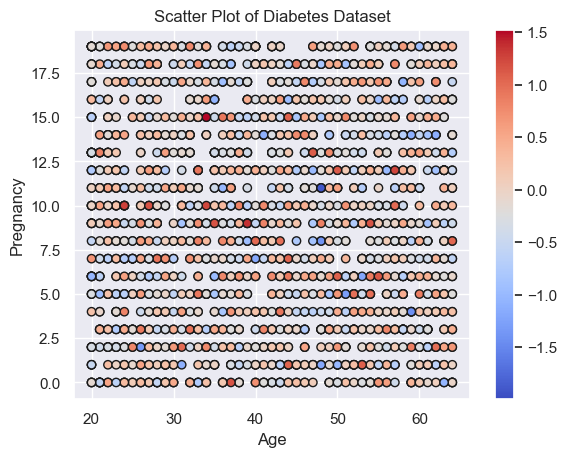

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have a diabetes dataset with the 'Age' and 'Pregnancy' columns
# Replace 'Age' and 'Pregnancy' with the actual column names in your dataset

# Define the data DataFrame
data = pd.DataFrame({
    'Age': np.random.randint(20, 65, 2000),  # Replace with your actual data
    'Pregnancy': np.random.randint(0, 20, 2000)  # Replace with your actual data
})

# Extract the features from the data DataFrame
Age = data['Age']
Pregnancy = data['Pregnancy']

# Add random noise to the y-coordinates
noise = np.random.randn(len(Age)) * 0.5

# Plot the scatter plot
plt.scatter(Age, Pregnancy, c=noise, cmap='coolwarm', edgecolors='k')
plt.xlabel('Age')
plt.ylabel('Pregnancy')
plt.title('Scatter Plot of Diabetes Dataset')
plt.colorbar()

# Show the plot
plt.show()


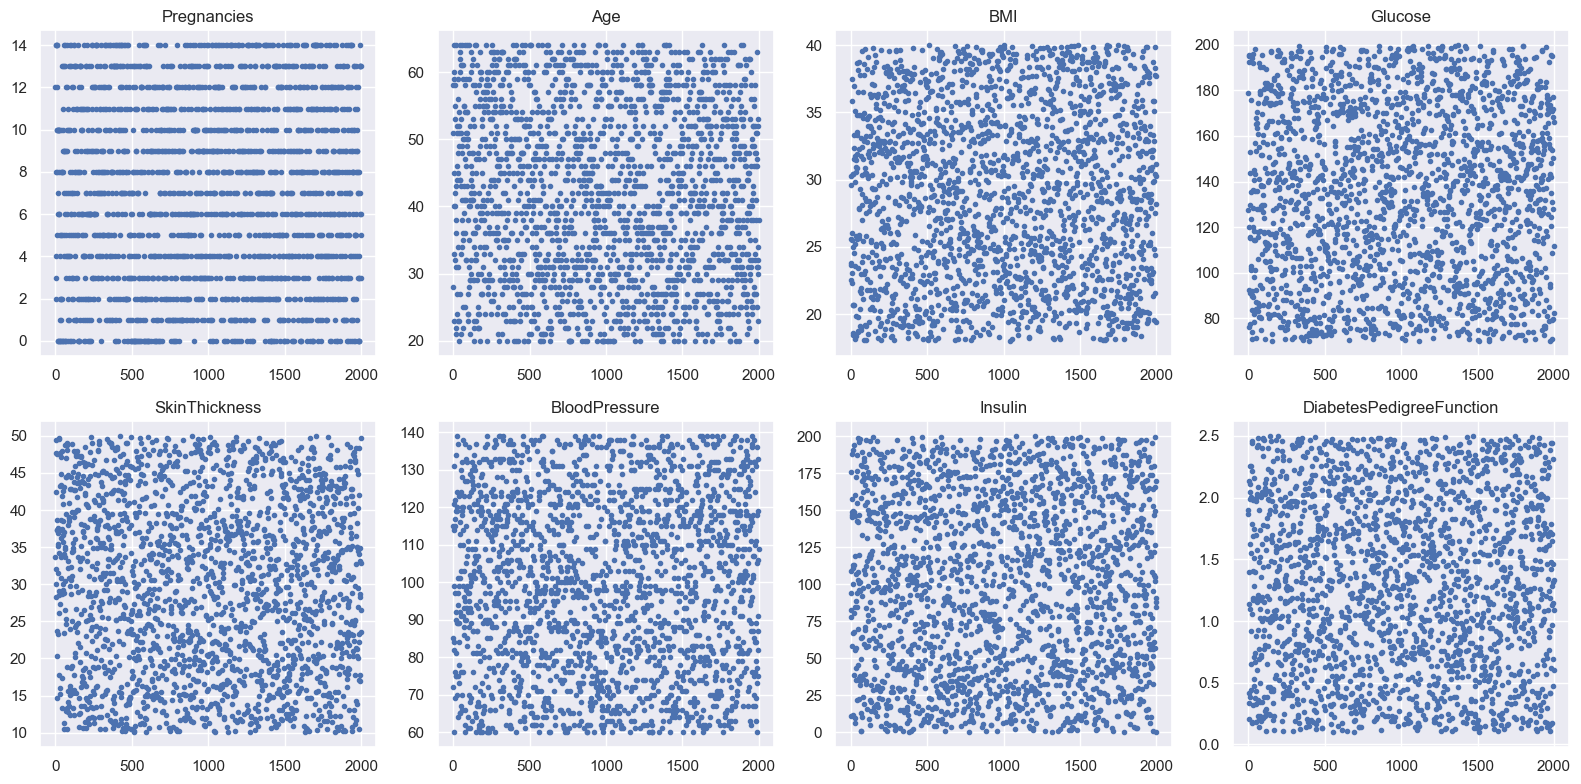

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have a diabetes dataset with the columns: pregnancies, age, BMI, sugar levels, thickness, blood pressure, insulin, pedigree
# Replace the column names with the actual column names in your dataset

# Define the data DataFrame
data = pd.DataFrame({
    'Pregnancies': np.random.randint(0, 15, 2000),  # Replace with your actual data
    'Age': np.random.randint(20, 65, 2000),  # Replace with your actual data
    'BMI': np.random.uniform(18.0, 40.0, 2000),  # Replace with your actual data
    'Glucose': np.random.uniform(70, 200, 2000),  # Replace with your actual data
    'SkinThickness': np.random.uniform(10, 50, 2000),  # Replace with your actual data
    'BloodPressure': np.random.randint(60, 140, 2000),  # Replace with your actual data
    'Insulin': np.random.uniform(0, 200, 2000),  # Replace with your actual data
    'DiabetesPedigreeFunction': np.random.uniform(0.1, 2.5, 2000)  # Replace with your actual data
})

# Create a figure and subplots for each variable
fig, axs = plt.subplots(2, 4, figsize=(16, 8))
axs = axs.flatten()

# Iterate over each variable and plot the dotted plot
for i, column in enumerate(data.columns):
    axs[i].plot(data[column], marker='.', linestyle='None')
    axs[i].set_title(column)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


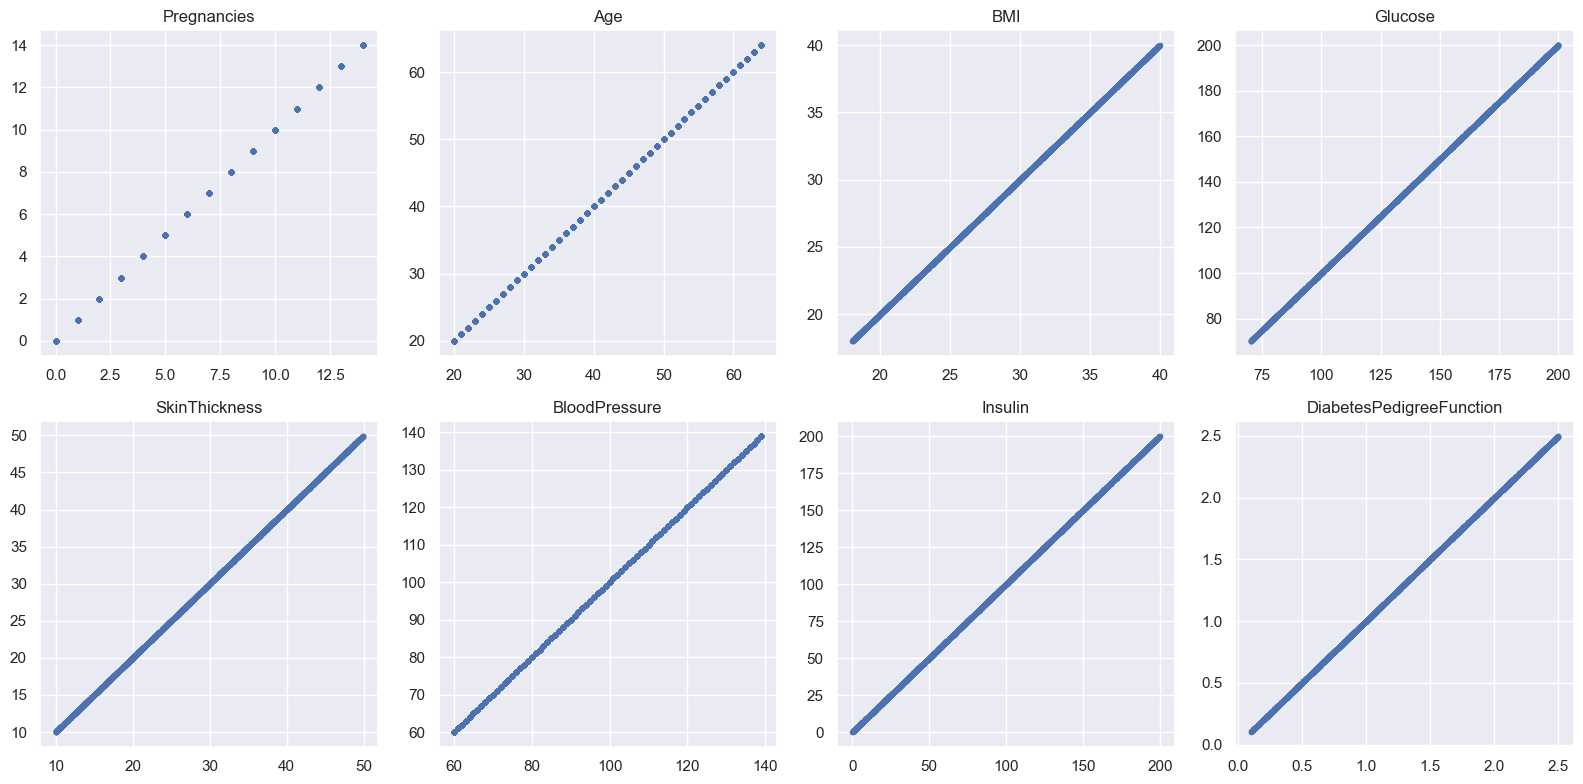

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have a diabetes dataset with the columns: pregnancies, age, BMI, sugar levels, thickness, blood pressure, insulin, pedigree
# Replace the column names with the actual column names in your dataset

# Define the data DataFrame
data = pd.DataFrame({
   'Pregnancies': np.random.randint(0, 15, 2000),  # Replace with your actual data
    'Age': np.random.randint(20, 65, 2000),  # Replace with your actual data
    'BMI': np.random.uniform(18.0, 40.0, 2000),  # Replace with your actual data
    'Glucose': np.random.uniform(70, 200, 2000),  # Replace with your actual data
    'SkinThickness': np.random.uniform(10, 50, 2000),  # Replace with your actual data
    'BloodPressure': np.random.randint(60, 140, 2000),  # Replace with your actual data
    'Insulin': np.random.uniform(0, 200, 2000),  # Replace with your actual data
    'DiabetesPedigreeFunction': np.random.uniform(0.1, 2.5, 2000)  # Replace with your actual data
})

# Create a scatter plot for each variable
fig, axs = plt.subplots(2, 4, figsize=(16, 8))
axs = axs.flatten()

# Iterate over each variable and plot the scatter plot
for i, column in enumerate(data.columns):
    axs[i].scatter(data[column], data[column], marker='.')
    axs[i].set_title(column)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()
